<a href="https://colab.research.google.com/github/granja17/FootballPredict/blob/main/Projeto_IACH_parte_02_previs%C3%A3o_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import matplotlib as mlp
import os
import warnings
from matplotlib.ticker import FuncFormatter
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

In [2]:
nome_do_arquivo = '/content/Big 5 2010 - 2020 - att.csv'

df = pd.read_csv(nome_do_arquivo, sep=';')
filtro = (df['Movement'] == 'in')
df = df.loc[filtro]

pd.to_numeric(df.Fee)
pd.to_numeric(df.Age)
df['Is Loan'] = df['Is Loan'].astype(str)
df['Age'] = df['Age'].astype(int)
df['Fee'].fillna(0, inplace=True)  # Substitui NaN por 0
df['Fee'] = df['Fee'].astype(int)
df['Season'] = pd.to_datetime(df['Season'], format='%Y')
df['Season'] = df['Season'].dt.strftime('%Y')
df.info('Age')
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11945 entries, 0 to 36539
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Club             11945 non-null  object
 1   Player           11945 non-null  object
 2   Age              11945 non-null  int64 
 3   Nationality      11945 non-null  object
 4   Position         11945 non-null  object
 5   Short Position   11945 non-null  object
 6   Market Value     11945 non-null  int64 
 7   Dealing Club     11945 non-null  object
 8   Dealing Country  11689 non-null  object
 9   Fee              11945 non-null  int64 
 10  Movement         11945 non-null  object
 11  Window           11945 non-null  object
 12  League           11945 non-null  object
 13  Season           11945 non-null  object
 14  Is Loan          11945 non-null  object
 15  Loan Status      296 non-null    object
dtypes: int64(3), object(13)
memory usage: 1.5+ MB


,Club,Player,Age,Nationality,Position,Short Position,Market Value,Dealing Club,Dealing Country,Fee,Movement,Window,League,Season,Is Loan,Loan Status
0,Paris Saint-Germain,Neymar,25,Brazil,Left Winger,Attacker,100000000,FC Barcelona,Spain,222000000,in,summer,Ligue 1,2017,False,NaN
3,Paris Saint-Germain,Kylian Mbappé,19,France,Centre-Forward,Attacker,120000000,Monaco,France,180000000,in,summer,Ligue 1,2018,False,NaN
5,FC Barcelona,Philippe Coutinho,25,Brazil,Attacking Midfield,Midfielder,90000000,Liverpool,England,135000000,in,winter,Laliga,2017,False,NaN
6,FC Barcelona,Ousmane Dembélé,20,France,Right Winger,Attacker,33000000,Bor. Dortmund,Germany,135000000,in,summer,Laliga,2017,False,NaN
8,Atlético Madrid,João Félix,19,Portugal,Second Striker,Attacker,70000000,Benfica,Portugal,127200000,in,summer,Laliga,2019,False,NaN


In [3]:
df.set_index('Season', drop=True, inplace=True)
df.head()

,Club,Player,Age,Nationality,Position,Short Position,Market Value,Dealing Club,Dealing Country,Fee,Movement,Window,League,Is Loan,Loan Status
Season,,,,,,,,,,,,,,,
2017,Paris Saint-Germain,Neymar,25,Brazil,Left Winger,Attacker,100000000,FC Barcelona,Spain,222000000,in,summer,Ligue 1,False,NaN
2018,Paris Saint-Germain,Kylian Mbappé,19,France,Centre-Forward,Attacker,120000000,Monaco,France,180000000,in,summer,Ligue 1,False,NaN
2017,FC Barcelona,Philippe Coutinho,25,Brazil,Attacking Midfield,Midfielder,90000000,Liverpool,England,135000000,in,winter,Laliga,False,NaN
2017,FC Barcelona,Ousmane Dembélé,20,France,Right Winger,Attacker,33000000,Bor. Dortmund,Germany,135000000,in,summer,Laliga,False,NaN
2019,Atlético Madrid,João Félix,19,Portugal,Second Striker,Attacker,70000000,Benfica,Portugal,127200000,in,summer,Laliga,False,NaN


In [4]:
gastos_por_liga = df.groupby(['League', 'Season'])['Fee'].sum().reset_index()
gastos_por_liga.set_index('Season', drop=True, inplace=True)


In [5]:
gastos_por_liga

,League,Fee
Season,,
2010,1 Bundesliga,213440000
2011,1 Bundesliga,218420000
2012,1 Bundesliga,291110000
2013,1 Bundesliga,305400000
2014,1 Bundesliga,368275000
2015,1 Bundesliga,475900000
2016,1 Bundesliga,707628000
2017,1 Bundesliga,723190000
2018,1 Bundesliga,568050000


# Realização do Modelo de Regressão Linear:
## Previsão de 2020 baseado em dados de 2010 a 2019

In [6]:
# 'Season' para int
gastos_por_liga.index = gastos_por_liga.index.astype(int)


# dados até 2019
filtro = gastos_por_liga.index <= 2019
dados_ate_2019 = gastos_por_liga[filtro]

previsoes_df2 = pd.DataFrame(columns=['League', 'Fee'])

# lista única de ligas
ligas = dados_ate_2019['League'].unique()

# modelo de regressão linear para cada liga
for liga in ligas:
    dados_liga = dados_ate_2019[dados_ate_2019['League'] == liga]

    X = dados_liga.index.values.reshape(-1, 1)
    y = dados_liga['Fee'].values

    model = LinearRegression()
    model.fit(X, y)

    # gastos para 2020 - previsão
    previsao_2020 = model.predict([[2020]])[0]

    # somando os resultados ao DataFrame de previsões
    previsoes_df2 = previsoes_df2.append({'League': liga, 'Fee': previsao_2020.astype(int)}, ignore_index=True)

#  previsões
previsoes_df2['Season'] = 2020
previsoes_df2 = previsoes_df2.set_index('Season')
previsoes_df2.info()
previsoes_df2


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 2020 to 2020
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   League  5 non-null      object
 1   Fee     5 non-null      object
dtypes: object(2)
memory usage: 120.0+ bytes


,League,Fee
Season,,
2020,1 Bundesliga,897409266
2020,Laliga,1283438466
2020,Ligue 1,830334333
2020,Premier League,2185397066
2020,Serie A,1365921833


# Criação de dados_completos que é o resultado dos dados reais de 2010 a 2019 concatenados a previsão 2020

In [7]:
# juntnado os DataFrames
dados_completos2 = pd.concat([dados_ate_2019, previsoes_df2])
dados_completos2 = dados_completos2.reset_index()

# dados completos
dados_completos2.sort_values(by='Season')

,Season,League,Fee
0,2010,1 Bundesliga,213440000
10,2010,Laliga,314230000
20,2010,Ligue 1,153915000
40,2010,Serie A,469626500
30,2010,Premier League,699110000
21,2011,Ligue 1,246940000
11,2011,Laliga,399615000
41,2011,Serie A,626721050
1,2011,1 Bundesliga,218420000
31,2011,Premier League,638573000


#Gráfico de dados até 2019 + previsão 2020

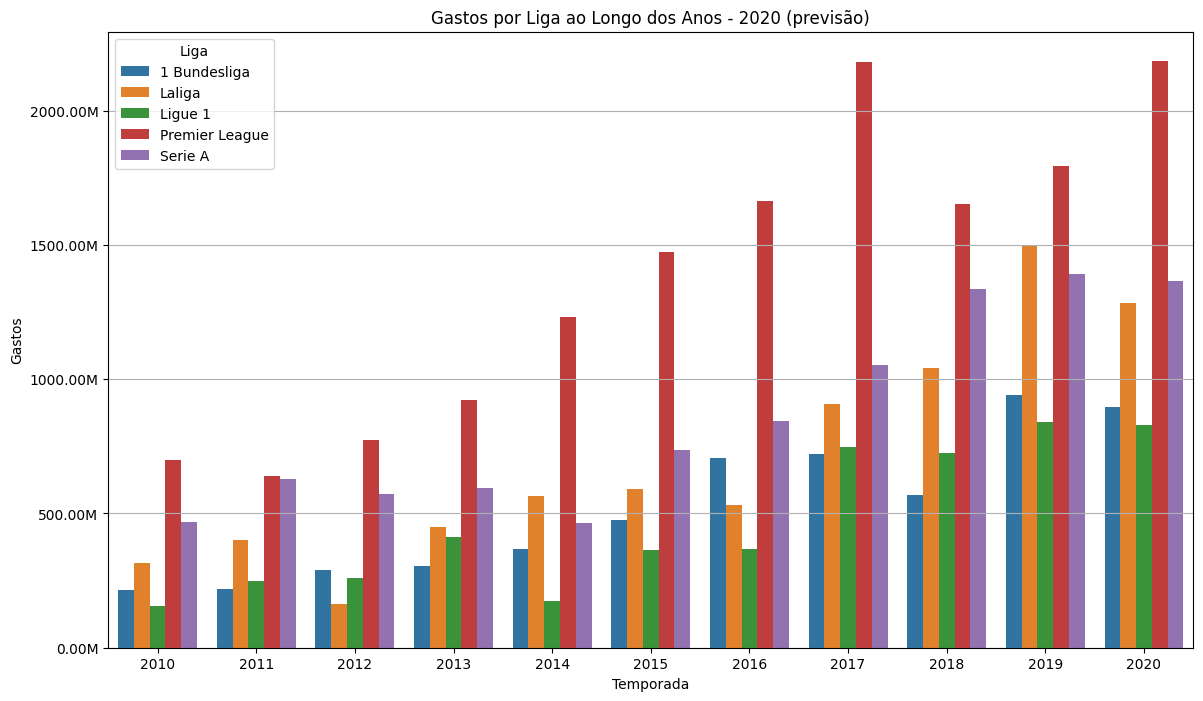

In [8]:
# gráfico de barras
plt.figure(figsize=(14, 8))
sns.barplot(x='Season', y='Fee', hue='League', data=dados_completos2, ci=None)


plt.title('Gastos por Liga ao Longo dos Anos - 2020 (previsão)')
plt.xlabel('Temporada')
plt.ylabel('Gastos')
plt.legend(title='Liga')

# eixo y em milhões
formatter = FuncFormatter(lambda x, pos: f'{x / 1e6:.2f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.grid(axis='y')

plt.show()


# Gráfico Previsão 2020 x Realidade 2020

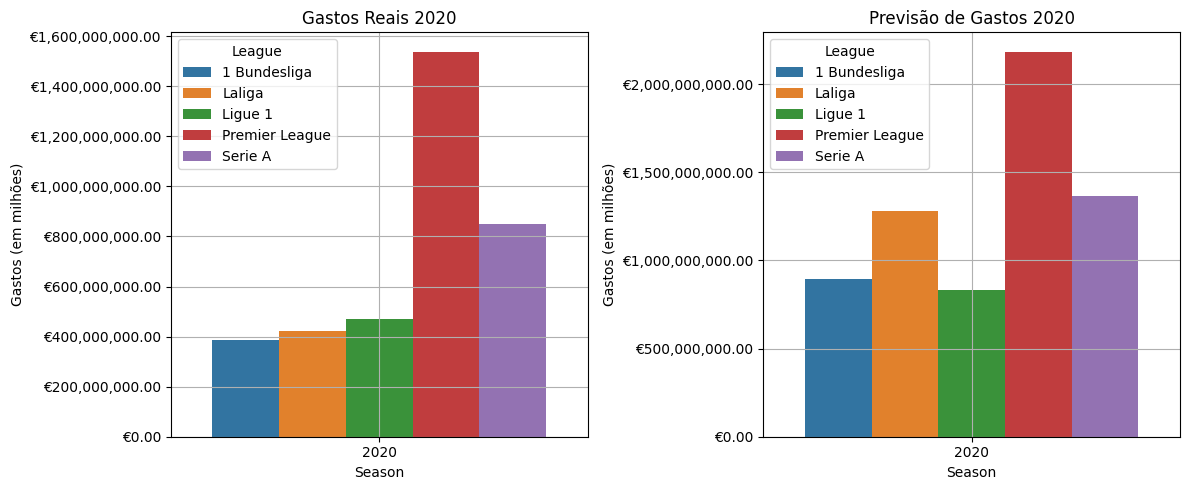

In [9]:
# 'dados_completos' para incluir apenas os dados de 2020
previsao_2020 = dados_completos2[dados_completos2['Season'] == 2020]

# 'gastos_por_liga' para incluir apenas os dados de 2020
gastos_2020 = gastos_por_liga.reset_index()
gastos_2020 = gastos_2020[gastos_2020['Season'] == 2020]


dados1 = gastos_2020
dados2 = previsao_2020

# DataFrames
df1 = pd.DataFrame(dados1)
df2 = pd.DataFrame(dados2)

# subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
palette = sns.color_palette('Set2')
# primeiro gráfico
sns.barplot(x='Season', y='Fee', hue='League', data=gastos_2020, ax=axes[0])
axes[0].set_title('Gastos Reais 2020')
axes[0].set_ylabel('Gastos (em milhões)')
axes[0].yaxis.set_major_formatter('€{:,.2f}'.format)
axes[0].grid(True)

# segundo gráfico
sns.barplot(x='Season', y='Fee', hue='League', data=previsao_2020, ax=axes[1])
axes[1].set_title('Previsão de Gastos 2020')
axes[1].set_ylabel('Gastos (em milhões)')
axes[1].yaxis.set_major_formatter('€{:,.2f}'.format)
axes[1].grid(True)

# Ajustando layout
plt.tight_layout()

# gráficos
plt.show()



In [10]:
gastos_reais = dados1['Fee']
previsao_gastos = dados2['Fee']

# MAE (Mean Absolute Error)
mae = mean_absolute_error(gastos_reais, previsao_gastos)
print(f'MAE: {mae:.2f}')

# MSE (Mean Squared Error)
mse = mean_squared_error(gastos_reais, previsao_gastos)
print(f'MSE: {mse:.2f}')

# RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse:.2f}')


MAE: 579322192.80
MSE: 363676935389579008.00
RMSE: 603056328.54


In [11]:
scaler = MinMaxScaler()

# Normalizando com scaler
gastos_reais_norm = scaler.fit_transform(gastos_reais.values.reshape(-1, 1))
previsao_gastos_norm = scaler.transform(previsao_gastos.values.reshape(-1, 1))

# Cálculo as métricas de erro
mae_norm = mean_absolute_error(gastos_reais_norm, previsao_gastos_norm)
mse_norm = mean_squared_error(gastos_reais_norm, previsao_gastos_norm)
rmse_norm = np.sqrt(mse_norm)

print(f'Normalized MAE: {mae_norm:.2f}')
print(f'Normalized MSE: {mse_norm:.2f}')
print(f'Normalized RMSE: {rmse_norm:.2f}')


Normalized MAE: 0.50
Normalized MSE: 0.27
Normalized RMSE: 0.52


# MAE, RMSE e MSE por Liga

In [12]:
gastos_reais = dados1['Fee']
previsao_gastos = dados2['Fee']


resultados_por_league = pd.DataFrame(columns=['League', 'MAE', 'MSE', 'RMSE'])

ligas = dados1['League'].unique()

# métricas para cada liga
for liga in ligas:
    # dados para a liga específica
    dados_liga_real = gastos_reais[dados1['League'] == liga]
    dados_liga_previsto = previsao_gastos[dados2['League'] == liga]

    # Calculando métricas para a liga
    mae_liga = mean_absolute_error(dados_liga_real, dados_liga_previsto)
    mse_liga = mean_squared_error(dados_liga_real, dados_liga_previsto)
    rmse_liga = np.sqrt(mse_liga)

    # Adicionando resultados ao DataFrame
    resultados_por_league = resultados_por_league.append({
        'League': liga,
        'MAE': mae_liga,
        'MSE': mse_liga,
        'RMSE': rmse_liga
    }, ignore_index=True)

# resultados
print(resultados_por_league)



           League          MAE           MSE         RMSE
0    1 Bundesliga  512859266.0  2.630246e+17  512859266.0
1          Laliga  861488466.0  7.421624e+17  861488466.0
2         Ligue 1  361344333.0  1.305697e+17  361344333.0
3  Premier League  646647066.0  4.181524e+17  646647066.0
4         Serie A  514271833.0  2.644755e+17  514271833.0


In [13]:
gastos_reais = dados1['Fee']
previsao_gastos = dados2['Fee']

# Normalizando os valores de 'Fee'
scaler = MinMaxScaler()
gastos_reais_norm = scaler.fit_transform(gastos_reais.values.reshape(-1, 1))
previsao_gastos_norm = scaler.transform(previsao_gastos.values.reshape(-1, 1))

# armazenar os resultados
resultados_por_league = pd.DataFrame(columns=['League', 'MAE', 'MSE', 'RMSE'])

# lista única de ligas
ligas = dados1['League'].unique()

# métricas para cada liga
for liga in ligas:
    # liga específica
    dados_liga_real = gastos_reais_norm[dados1['League'] == liga]
    dados_liga_previsto = previsao_gastos_norm[dados2['League'] == liga]

    # métricas para a liga
    mae_liga = mean_absolute_error(dados_liga_real, dados_liga_previsto)
    mse_liga = mean_squared_error(dados_liga_real, dados_liga_previsto)
    rmse_liga = np.sqrt(mse_liga)

    # Adicionando resultados ao DataFrame
    resultados_por_league = resultados_por_league.append({
        'League': liga,
        'MAE': mae_liga,
        'MSE': mse_liga,
        'RMSE': rmse_liga
    }, ignore_index=True)

# resultados
print(resultados_por_league)



           League       MAE       MSE      RMSE
0    1 Bundesliga  0.444342  0.197440  0.444342
1          Laliga  0.746394  0.557105  0.746394
2         Ligue 1  0.313069  0.098012  0.313069
3  Premier League  0.560256  0.313886  0.560256
4         Serie A  0.445566  0.198529  0.445566


# Train 60, test 40

In [14]:
gastos_por_liga=gastos_por_liga.reset_index()

In [15]:
# treino (até 2019) e teste (2020) para cada liga
leagues = gastos_por_liga['League'].unique()

results_list1 = []

for league in leagues:
    league_data = gastos_por_liga[gastos_por_liga['League'] == league]

    # dados de treino (até 2019) e teste (2020)
    train_data = league_data[league_data['Season'] <= 2019]
    test_data = league_data[league_data['Season'] == 2020]

    # features e alvo
    X_train = train_data[['Season']]
    y_train = train_data['Fee']

    X_test = test_data[['Season']]
    y_test = test_data['Fee']

    # conjuntos de treino e teste
    # Divisão 60/40
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.4, random_state=42)

    # modelo de regressão linear
    model = LinearRegression()

    # Treinar o modelo nos dados de treino
    model.fit(X_train, y_train)

    # previsões nos dados de teste
    predictions = model.predict(X_test).astype(int)

    # resultados para a Liga
    results = pd.DataFrame({'Real': y_test, 'Previsto': predictions, 'Diferença': y_test - predictions})
    results_list1.append(results)

    print(f'Resultados para a Liga {league}:')
    print(results)
    print("\n")

Resultados para a Liga 1 Bundesliga:
         Real    Previsto  Diferença
10  384550000  1043931181 -659381181


Resultados para a Liga Laliga:
         Real    Previsto   Diferença
21  421950000  1474716205 -1052766205


Resultados para a Liga Ligue 1:
         Real   Previsto  Diferença
32  468990000  879880095 -410890095


Resultados para a Liga Premier League:
          Real    Previsto  Diferença
43  1538750000  2312423698 -773673698


Resultados para a Liga Serie A:
         Real    Previsto  Diferença
54  851650000  1420897493 -569247493




# Train 80, test 20 - com MSE, MAE e RMSE

In [16]:
# métricas por liga
mse_list = []
mae_list = []
rmse_list = []

# resultados por liga
results_list = []

# dados de treino (até 2019) e teste (2020) para cada liga
leagues = gastos_por_liga['League'].unique()

for league in leagues:
    league_data = gastos_por_liga[gastos_por_liga['League'] == league]

    # dados de treino (até 2019) e teste (2020)
    train_data = league_data[league_data['Season'] <= 2019]
    test_data = league_data[league_data['Season'] == 2020]

    # features e alvo
    X_train = train_data[['Season']]
    y_train = train_data['Fee']

    X_test = test_data[['Season']]
    y_test = test_data['Fee']

    # conjuntos de treino e teste
    # Divisão 80/20
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # modelo de regressão linear
    model = LinearRegression()

    # modelo nos dados de treino
    model.fit(X_train, y_train)

    # previsões nos dados de teste
    predictions = model.predict(X_test).astype(int)

    # Cálculo das métricas
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mse)

    # Adicionar métricas a lista
    mse_list.append(mse)
    mae_list.append(mae)
    rmse_list.append(rmse)

    # Adicionar resultados ao DataFrame results_list
    results = pd.DataFrame({'Real': y_test.values, 'Previsto': predictions, 'Diferenca': y_test.values - predictions})
    results_list.append(results)

    # resultados para a Liga
    print(f'Resultados para a Liga {league}:')
    print(results)
    print(f'MSE: {mse}')
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}\n')

# resultados para todas as ligas
all_results = pd.concat(results_list)

# métricas médias para todas as ligas
print("Médias das Métricas para Todas as Ligas:")
print(f'Média MSE: {np.mean(mse_list)}')
print(f'Média MAE: {np.mean(mae_list)}')
print(f'Média RMSE: {np.mean(rmse_list)}')

# diferenças entre Real e Previsto
print("\nResultados com Diferenças:")
all_results["League"] = "1 Bundesliga", "Laliga", "Ligue 1", "Premier League", "Serie A"
all_results


Resultados para a Liga 1 Bundesliga:
        Real   Previsto  Diferenca
0  384550000  979143560 -594593560
MSE: 3.535415015934736e+17
MAE: 594593560.0
RMSE: 594593560.0

Resultados para a Liga Laliga:
        Real    Previsto  Diferenca
0  421950000  1320474422 -898524422
MSE: 8.07346136930434e+17
MAE: 898524422.0
RMSE: 898524422.0

Resultados para a Liga Ligue 1:
        Real   Previsto  Diferenca
0  468990000  826274008 -357284008
MSE: 1.2765186237254406e+17
MAE: 357284008.0
RMSE: 357284008.0

Resultados para a Liga Premier League:
         Real    Previsto  Diferenca
0  1538750000  2260341612 -721591612
MSE: 5.206944545087585e+17
MAE: 721591612.0
RMSE: 721591612.0

Resultados para a Liga Serie A:
        Real    Previsto  Diferenca
0  851650000  1321854244 -470204244
MSE: 2.2109203107561152e+17
MAE: 470204244.0
RMSE: 470204244.0

Médias das Métricas para Todas as Ligas:
Média MSE: 4.0606519729616435e+17
Média MAE: 608439569.2
Média RMSE: 608439569.2

Resultados com Diferenças:


,Real,Previsto,Diferenca,League
0,384550000,979143560,-594593560,1 Bundesliga
0,421950000,1320474422,-898524422,Laliga
0,468990000,826274008,-357284008,Ligue 1
0,1538750000,2260341612,-721591612,Premier League
0,851650000,1321854244,-470204244,Serie A


# TVT 40-30-30

In [17]:
dados_completos2

,Season,League,Fee
0,2010,1 Bundesliga,213440000
1,2011,1 Bundesliga,218420000
2,2012,1 Bundesliga,291110000
3,2013,1 Bundesliga,305400000
4,2014,1 Bundesliga,368275000
5,2015,1 Bundesliga,475900000
6,2016,1 Bundesliga,707628000
7,2017,1 Bundesliga,723190000
8,2018,1 Bundesliga,568050000
9,2019,1 Bundesliga,942240000


In [18]:
# dados por liga
leagues = dados_completos2['League'].unique()

# listas para armazenar os resultados
val_results_list = []
test_results_list = []

for league in leagues:
    # dados para a liga específica
    league_data = gastos_por_liga[gastos_por_liga['League'] == league]

    # dados em treino (até 2019), validação e teste (2020)
    train_data = league_data[league_data['Season'] <= 2019]
    test_data = league_data[league_data['Season'] == 2020]

    # dados de treino em treino e validação
    train_data, val_data = train_test_split(train_data, test_size=0.3, train_size=0.4, random_state=42)

    # features e alvo para treino
    X_train = train_data[['Season']]
    y_train = train_data['Fee']

    # features e alvo para validação
    X_val = val_data[['Season']]
    y_val = val_data['Fee']

    # features e alvo para teste
    X_test = test_data[['Season']]
    y_test = test_data['Fee']

    # modelo de regressão linear
    model = LinearRegression()

    # modelo nos dados de treino
    model.fit(X_train, y_train)

    # previsões nos dados de validação
    predictions_val = model.predict(X_val).astype(int)

    # Adicionar resultados para o ano de 2020 na validação
    val_results = pd.DataFrame({'Real': y_val, 'Previsto': predictions_val, 'League': val_data['League'], 'Season': val_data['Season']})
    val_results_2020 = val_results[val_results['Season'] == 2020]
    val_results_list.append(val_results_2020)

    # previsões nos dados de teste
    predictions_test = model.predict(X_test).astype(int)

    # resultados para o ano de 2020 no teste
    test_results = pd.DataFrame({'Real': y_test, 'Previsto': predictions_test, 'League': test_data['League'], 'Season': test_data['Season']})
    test_results_2020 = test_results[test_results['Season'] == 2020]
    test_results_list.append(test_results_2020)

# Consolidar os resultados para validação e teste
val_results_final = pd.concat(val_results_list)
test_results_final = pd.concat(test_results_list)

# Converter as colunas de previsões e valores reais para inteiros
val_results_final['Previsto'] = val_results_final['Previsto'].astype(int)
test_results_final['Previsto'] = test_results_final['Previsto'].astype(int)
val_results_final['Real'] = val_results_final['Real'].astype(int)
test_results_final['Real'] = test_results_final['Real'].astype(int)

print("\nValores por Liga na Teste (2020):")
final = (test_results_final.groupby(['League']).mean())
final['Real'] = final["Real"].astype(int)
final['Previsto'] = final["Previsto"].astype(int)
final['Season'] = final["Season"].astype(int)
final['Diferença'] = final['Real'] - final["Previsto"]
final



Valores por Liga na Teste (2020):


,Real,Previsto,Season,Diferença
League,,,,
1 Bundesliga,384550000,994927075,2020,-610377075
Laliga,421950000,1465140660,2020,-1043190660
Ligue 1,468990000,947202122,2020,-478212122
Premier League,1538750000,2239409216,2020,-700659216
Serie A,851650000,1427226873,2020,-575576873
